In [1]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv("cleaned_data.csv")

In [3]:
colonnes = list(df1.columns)
print(colonnes)

['CarName', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']


In [4]:
df1

,CarName,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romeo,convertible,rwd,225.04,428.75,162.81,1155.75,dohc,4,130,mpfi,3.47,111,21,27,13495.0
1,alfa-romeo,convertible,rwd,225.04,428.75,162.81,1155.75,dohc,4,130,mpfi,3.47,111,21,27,16500.0
2,alfa-romeo,hatchback,rwd,240.03,434.85,166.37,1280.49,ohcv,6,152,mpfi,2.68,154,19,26,16500.0
3,audi,sedan,fwd,253.49,448.56,168.15,1060.05,ohc,4,109,mpfi,3.19,102,24,30,13950.0
4,audi,sedan,4wd,252.48,448.56,168.66,1280.94,ohc,5,136,mpfi,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,sedan,rwd,277.11,479.55,175.01,1339.00,ohc,4,141,mpfi,3.78,114,23,28,16845.0
201,volvo,sedan,rwd,277.11,479.55,174.75,1383.00,ohc,4,141,mpfi,3.78,160,19,25,19045.0
202,volvo,sedan,rwd,277.11,479.55,175.01,1366.22,ohcv,6,173,mpfi,3.58,134,18,23,21485.0
203,volvo,sedan,rwd,277.11,479.55,175.01,1459.21,ohc,6,145,idi,3.01,106,26,27,22470.0


In [5]:
y = df1['price']
X = df1[['CarName', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg']]

numeric_features =  ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'cylindernumber']
numeric_transformer = Pipeline([
    ('stdscaler', MinMaxScaler()),  
])

categorial_features = ['CarName','carbody', 'drivewheel', 'enginetype', 'fuelsystem']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)

model = Ridge()
pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)

pipe.fit(X_train, y_train)
pipe.predict(X_test)
pipe.score(X_test, y_test)

0.9077350629277867

In [10]:
y = df1['price']
X = df1[['CarName', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg']]

numeric_features =  ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'cylindernumber']
numeric_transformer = Pipeline([
    ('stdscaler', MinMaxScaler()),  
])

categorial_features = ['CarName','carbody', 'drivewheel', 'enginetype', 'fuelsystem']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)

model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=None, min_samples_split=5, min_samples_leaf=2)

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

pipe.fit(X_train, y_train)
pipe.predict(X_test)
pipe.score(X_test, y_test)

with open('model_predict_car.pkl', 'wb') as file:
    pickle.dump(pipe, file)

In [7]:
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=0,
                           random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X, y)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [8]:
print(grid_search.best_params_)


{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


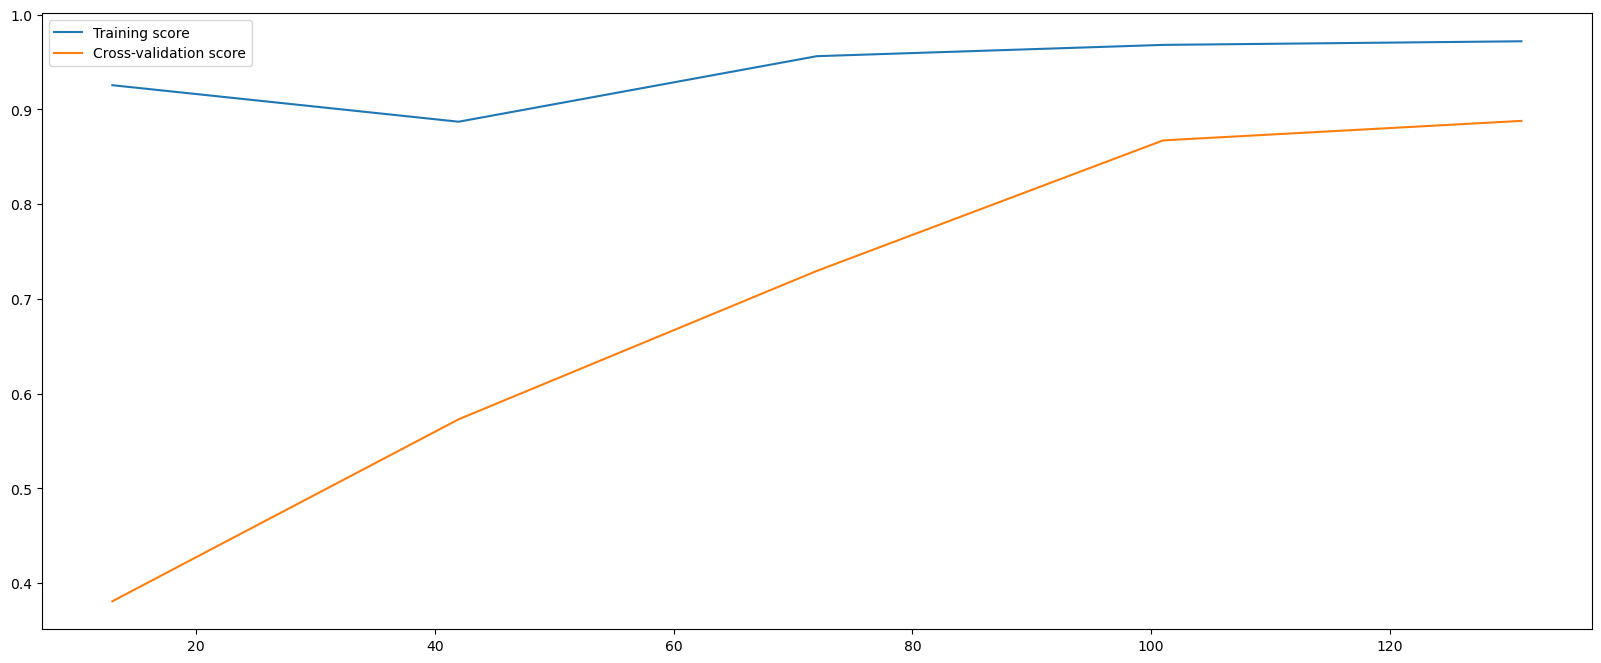

In [9]:
train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.figure(figsize=(20, 8))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.legend()
plt.show()
